In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mcolors
import cmcrameri.cm as cmc
from tqdm import tqdm

# --- Parameters ---
num_fils = 309
num_segs = 20
num_steps = 500
sphere_radius = 197.6 

# --- File Paths ---
# Make sure to use the correct simulation data path
sim_name = 'wave_k38'
date = '20250715'
base_path = f'../data/{sim_name}/{date}/ciliate_309fil_9000blob_8.00R_0.1000torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift'
seg_file_path = f'{base_path}_seg_states.dat'
phase_file_path = f'{base_path}_true_states.dat'

# --- Load Data ---
seg_data = np.loadtxt(seg_file_path)
phase_data = np.loadtxt(phase_file_path)

# --- Process Data ---
time = seg_data[:, 0] / num_steps
num_steps = len(time)

# Reshape segment data: (time, num_fils, num_segs, 3)
seg_positions = seg_data[:, 1:].reshape(num_steps, num_fils, num_segs, 3)

# Extract phases: (time, num_fils)
phases = np.mod(phase_data[:, 2:num_fils+2], 2*np.pi)

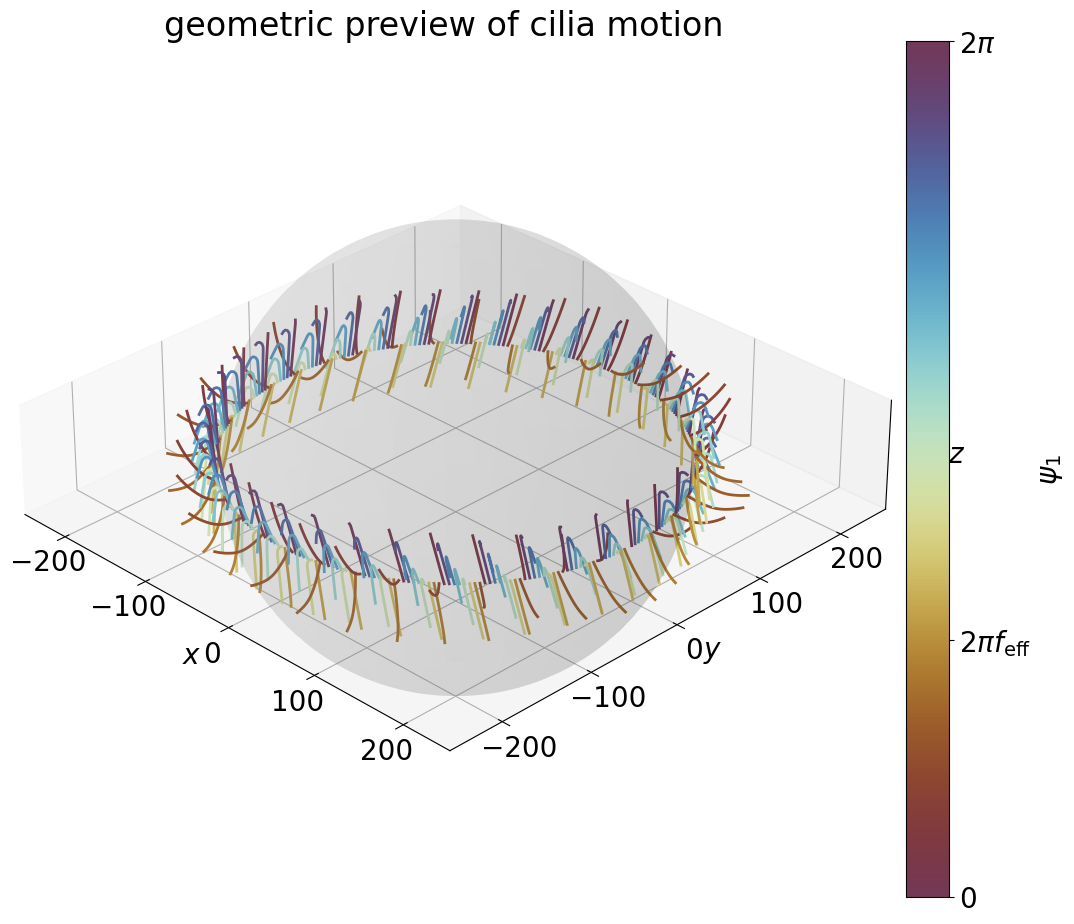

In [16]:
plt.rcParams.update({
    # "text.usetex": True,
    # "font.family": "serif",
    "font.size": 20  # Set the font size here
})

# --- Preview First Frame ---
fig_preview = plt.figure(figsize=(12, 12))
ax_preview = fig_preview.add_subplot(111, projection='3d')

# Setup colormap
cmap = cmc.romaO
norm = mcolors.Normalize(vmin=0, vmax=2*np.pi)

# Plot the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = sphere_radius * np.outer(np.cos(u), np.sin(v))
y_sphere = sphere_radius * np.outer(np.sin(u), np.sin(v))
z_sphere = sphere_radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax_preview.plot_surface(x_sphere, y_sphere, z_sphere, color='grey', alpha=0.1)

# Set axis limits based on the initial positions of the cilia
x_coords = seg_positions[0, :, :, 0]
y_coords = seg_positions[0, :, :, 1]
z_coords = seg_positions[0, :, :, 2]

margin = 2.0
ax_preview.set_xlim(np.min(x_coords) - margin, np.max(x_coords) + margin)
ax_preview.set_ylim(np.min(y_coords) - margin, np.max(y_coords) + margin)
ax_preview.set_zlim(np.min(z_coords) - margin, np.max(z_coords) + margin)

ax_preview.set_xlabel(r'$x$')
ax_preview.set_ylabel(r'$y$')
ax_preview.set_zlabel(r'$z$')
ax_preview.set_title(r'geometric preview of cilia motion')
ax_preview.set_aspect('equal')
ax_preview.grid(True, alpha=0.3)

# Hide z-ticks
ax_preview.set_zticks([])

# Set view angle for isometric view
ax_preview.view_init(elev=30, azim=-45)

# Plot each cilium for the first frame
for i in range(num_fils):
    cilium_positions = seg_positions[0, i, :, :]
    x_data = cilium_positions[:, 0]
    y_data = cilium_positions[:, 1]
    z_data = cilium_positions[:, 2]
    ax_preview.plot(x_data, y_data, z_data, '-', lw=2, color=cmap(norm(phases[0, i])))

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig_preview.colorbar(sm, ax=ax_preview, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label(r'$\psi_1$')
# Set custom ticks for the colorbar
cbar.set_ticks([0, 0.6*np.pi, 2*np.pi])
cbar.set_ticklabels([r'$0$', r'$2\pi f_{\mathrm{eff}}$', r'$2\pi$'])

plt.show()

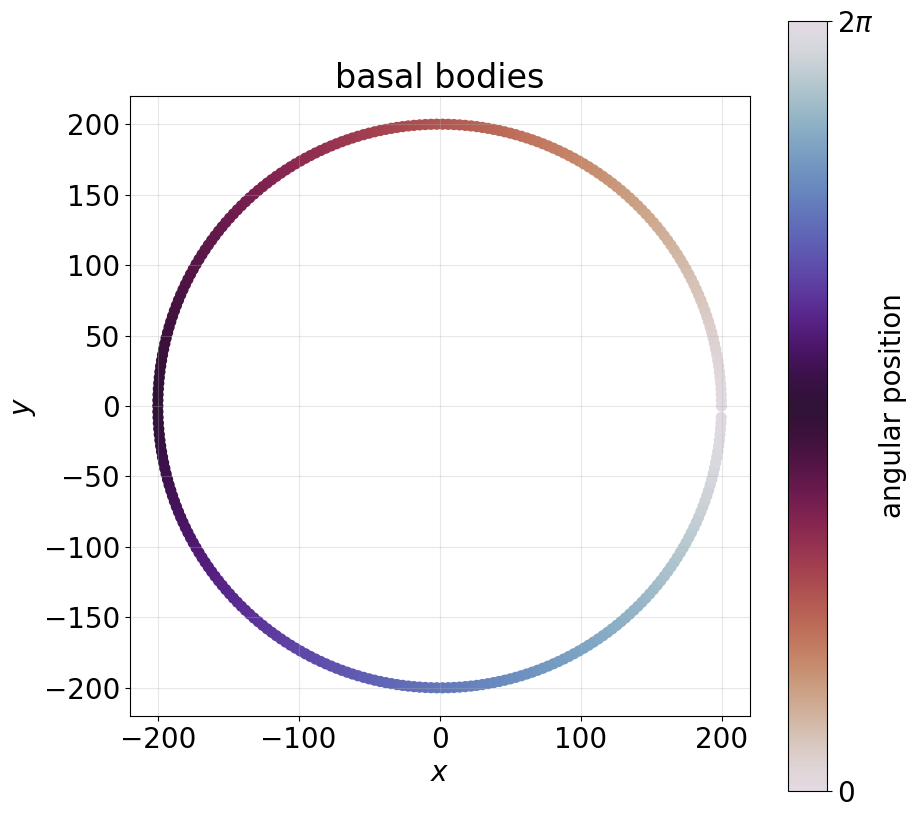

In [8]:
plt.rcParams.update({
    # "text.usetex": True,
    # "font.family": "serif",
    "font.size": 20
})

# --- Plot Cilia Positions ---
fig_pos, ax_pos = plt.subplots(figsize=(10, 10))

# Get the base positions of all cilia
base_positions = seg_positions[0, :, 0, :]
x_coords = base_positions[:, 0]
y_coords = base_positions[:, 1]

# Create an array of angular positions for coloring
angular_positions = np.linspace(0, 2 * np.pi * (num_fils - 1) / num_fils, num_fils)

# Create the scatter plot using a cyclical colormap
scatter = ax_pos.scatter(x_coords, y_coords, c=angular_positions, cmap="twilight_r", s=50, vmin=0, vmax=2*np.pi)

# Add a colorbar
cbar_pos = fig_pos.colorbar(scatter, ax=ax_pos)
cbar_pos.set_label('angular position')
cbar_pos.set_ticks([0, 2*np.pi])
cbar_pos.set_ticklabels([r'$0$', r'$2\pi$'])

# Set labels and title
ax_pos.set_xlabel(r'$x$')
ax_pos.set_ylabel(r'$y$')
ax_pos.set_title('basal bodies')
ax_pos.set_aspect('equal', adjustable='box')
ax_pos.grid(True, alpha=0.3)

plt.show()

# Reset matplotlib defaults
plt.rcParams.update(plt.rcParamsDefault)